# PS02, Q01

In [41]:
import polars as pl
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [42]:
df = pl.read_csv('../data/dolphin.csv', has_header = False)
matrix = df.to_numpy() # Nice function I found online.
matrix

array([[12, 12,  8,  7,  7,  4,  7,  4,  0,  0,  0,  0,  0],
       [12, 12,  8,  7,  7,  4,  7,  4,  0,  0,  0,  0,  0],
       [ 8,  8, 24, 23, 18,  3,  5,  3,  0,  0,  0,  0,  0],
       [ 7,  7, 23, 26, 19,  2,  4,  2,  0,  0,  0,  0,  0],
       [ 7,  7, 18, 19, 20,  3,  5,  3,  0,  0,  0,  0,  0],
       [ 4,  4,  3,  2,  3, 21, 20, 21,  0,  0,  0,  0,  0],
       [ 7,  7,  5,  4,  5, 20, 23, 20,  0,  0,  0,  0,  0],
       [ 4,  4,  3,  2,  3, 21, 20, 21,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 31, 26,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 26, 28,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 35, 31, 24],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 31, 31, 22],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 24, 22, 25]])

In [43]:
A = (matrix >= 5)*1
np.fill_diagonal(A,0) # Filling diagonal as asked.
A

array([[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]])

In [44]:
num_nodes = A.shape[0]
ones = np.ones((num_nodes, 1)) # Getting $\mathbf{1}$ as asked.

In [45]:
# Degree of each node
# Formula: k = A @ 1
k = A @ ones
print(f'\nDegree of each node (k): {k.astype(int).flatten()}')


Degree of each node (k): [5 5 5 4 5 2 6 2 1 1 2 2 2]


In [46]:
m_matrix = 0.5 * ones.T @ A @ ones
num_edges = int(m_matrix.item()) # `.item()` is a nice func to extract single scalar value.
print(f'\nTotal number of edges (m): {num_edges}')


Total number of edges (m): 21


In [47]:
# Number of common neighbors for nodes 0 and 3
# Formula: N = A^2
N = A @ A
common_neighbors_0_3 = N[0,3]
print(f'\nNumber of common neighbors for nodes 0 and 3: {common_neighbors_0_3}')



Number of common neighbors for nodes 0 and 3: 3


In [48]:
# Total number of triangles
# Formula: T = (1/6) * Tr(A^3)
A_cubed = np.linalg.matrix_power(A, 3)
trace_A3 = np.trace(A_cubed) # From docmentation
num_triangles = int(trace_A3 / 6)
print(f'\nTotal number of triangles: {num_triangles}')


Total number of triangles: 18


# PS02, Q02

In [49]:
df = pl.read_csv('../data/bts2025.csv')
df = df.filter(pl.col('PASSENGERS') > 1000)

G = nx.DiGraph(df[['ORIGIN', 'DEST']].rows())
lscc = max(nx.strongly_connected_components(G), key = len)
G = G.subgraph(lscc).copy()

# Variables that you may need.
nodedict = {node : i for i, node in enumerate(G.nodes)}
reverse_nodedict = {i : node for i, node in enumerate(G.nodes)}
A = nx.to_numpy_array(G, nodelist = nodedict.keys(), dtype = int)


--- a) Adjacency Matrix Spy Plot ---


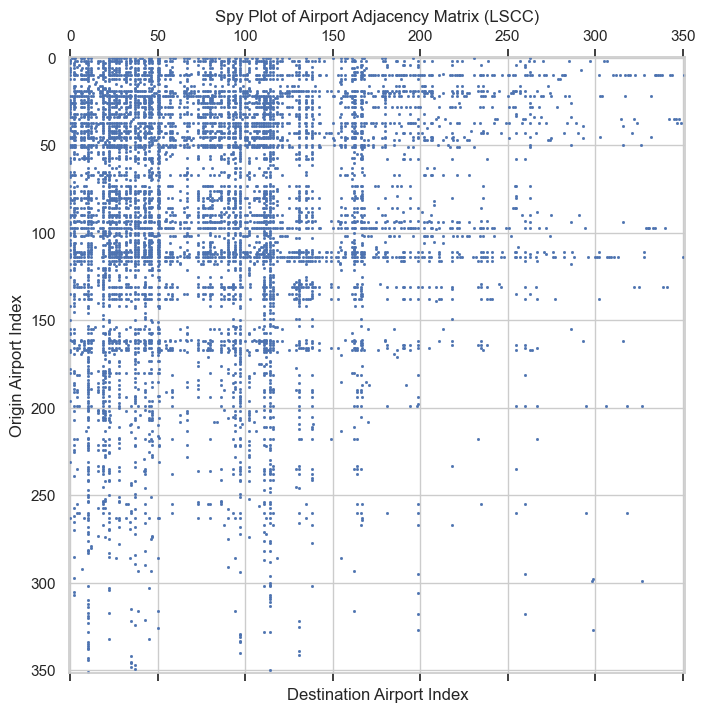

In [50]:
# a) Draw the adjacency matrix with a spy plot
print("\n--- a) Adjacency Matrix Spy Plot ---")
plt.figure(figsize = (8, 8))
plt.spy(A, markersize = 1)
plt.title("Spy Plot of Airport Adjacency Matrix (LSCC)")
plt.xlabel("Destination Airport Index")
plt.ylabel("Origin Airport Index")
plt.show()

In [51]:
# b) Calculate the diameter of this network
# The diameter is the longest shortest path between any two nodes in the network.
print("\n--- b) Network Diameter ---")
diameter = nx.diameter(G)
print(f"The diameter of the airport network is: {diameter}")


--- b) Network Diameter ---
The diameter of the airport network is: 6


In [52]:
# c) Find the number of airports reachable from Charlottesville (CHO).
print("\n--- c) Airports Reachable from Charlottesville (CHO) ---")
cho_code = 'CHO'
if cho_code in G:
    # Gets shortest path lengths from CHO to all other nodes!
    path_lengths = nx.single_source_shortest_path_length(G, cho_code)
    
    # Get a list of all the distances (1, 2, 3, etc.)
    distances = list(path_lengths.values())
    
    # Manually count the occurrences of each distance
    for i in range(1, 5):
        count = distances.count(i)
        print(f"Airports reachable in exactly {i} flight(s): {count}")


--- c) Airports Reachable from Charlottesville (CHO) ---
Airports reachable in exactly 1 flight(s): 5
Airports reachable in exactly 2 flight(s): 192
Airports reachable in exactly 3 flight(s): 150
Airports reachable in exactly 4 flight(s): 3


In [53]:
# d) What are the top-5 airports by degree?
print("\n--- d) Top-5 Airports by Degree ---")
# For a directed graph, we'll consider total degree (in + out).
# In-degree is the sum of columns, Out-degree is the sum of rows.
in_degrees = A.sum(axis=0)
out_degrees = A.sum(axis=1)
total_degrees = in_degrees + out_degrees

# Pair degrees with airport codes
degree_list = [(total_degrees[i], reverse_nodedict[i]) for i in range(A.shape[0])] # Loop.
degree_list.sort(key = lambda x : x[0], reverse = True) # `.sort` ranks it.

print("Top 5 airports by total degree:")
for degree, airport in degree_list[:5]: # After ranking, we go from greatest to fifth.
    print(f"- {airport}: {degree} degree")


--- d) Top-5 Airports by Degree ---
Top 5 airports by total degree:
- DFW: 354 degree
- DEN: 326 degree
- ATL: 306 degree
- ORD: 297 degree
- CLT: 266 degree



--- e) Degree Distribution ---


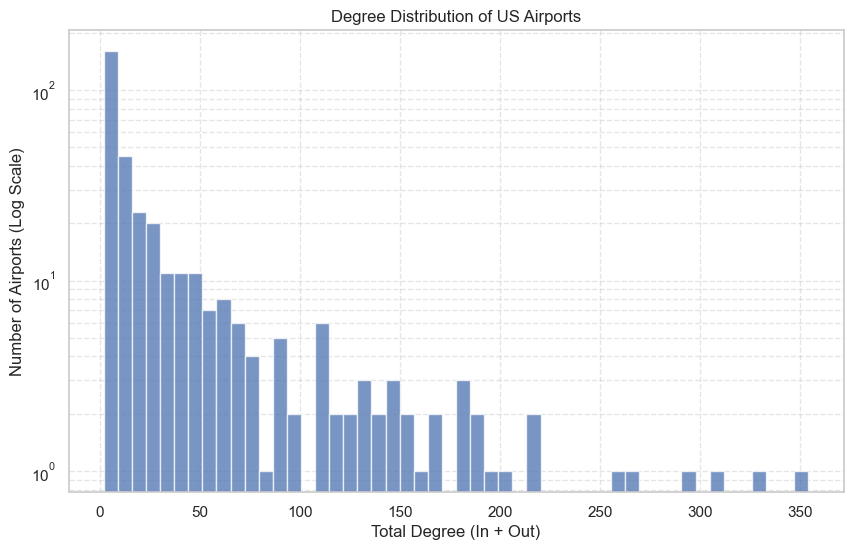

In [54]:
# e) Plot a histogram of the network's degree distribution using matplotlib
print("\n--- e) Degree Distribution ---")

plt.figure(figsize = (10, 6))

# Create the histogram using matplotlib's hist function.
plt.hist(total_degrees, bins = 50, alpha = 0.75)

# Apply the log scale to the y-axis
plt.yscale('log')

# Add titles and labels as before
plt.title("Degree Distribution of US Airports")
plt.xlabel("Total Degree (In + Out)")
plt.ylabel("Number of Airports (Log Scale)")
plt.grid(True, which = "both", ls = "--", alpha = 0.5)
plt.show()